In [2]:
import pandas as pd
import seaborn as sns


In [30]:
df = pd.DataFrame(sns.load_dataset('iris'))

In [31]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [33]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

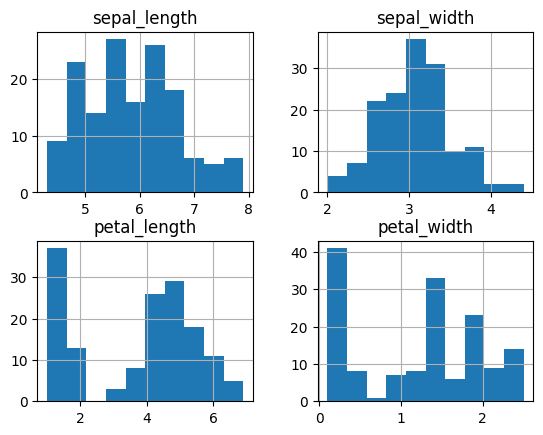

In [34]:
df.hist()

In [46]:
from sklearn.preprocessing import OrdinalEncoder

In [49]:
enc = OrdinalEncoder()
df['species_enc'] = enc.fit_transform(df[['species']])

In [51]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_enc
0,5.1,3.5,1.4,0.2,setosa,0.0
1,4.9,3.0,1.4,0.2,setosa,0.0
2,4.7,3.2,1.3,0.2,setosa,0.0
3,4.6,3.1,1.5,0.2,setosa,0.0
4,5.0,3.6,1.4,0.2,setosa,0.0


In [52]:
df.drop('species', axis=1, inplace=True)

In [53]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_enc
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
answer = df['species_enc']
data = df.drop(columns=['species_enc'])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(data, answer, test_size=0.2)

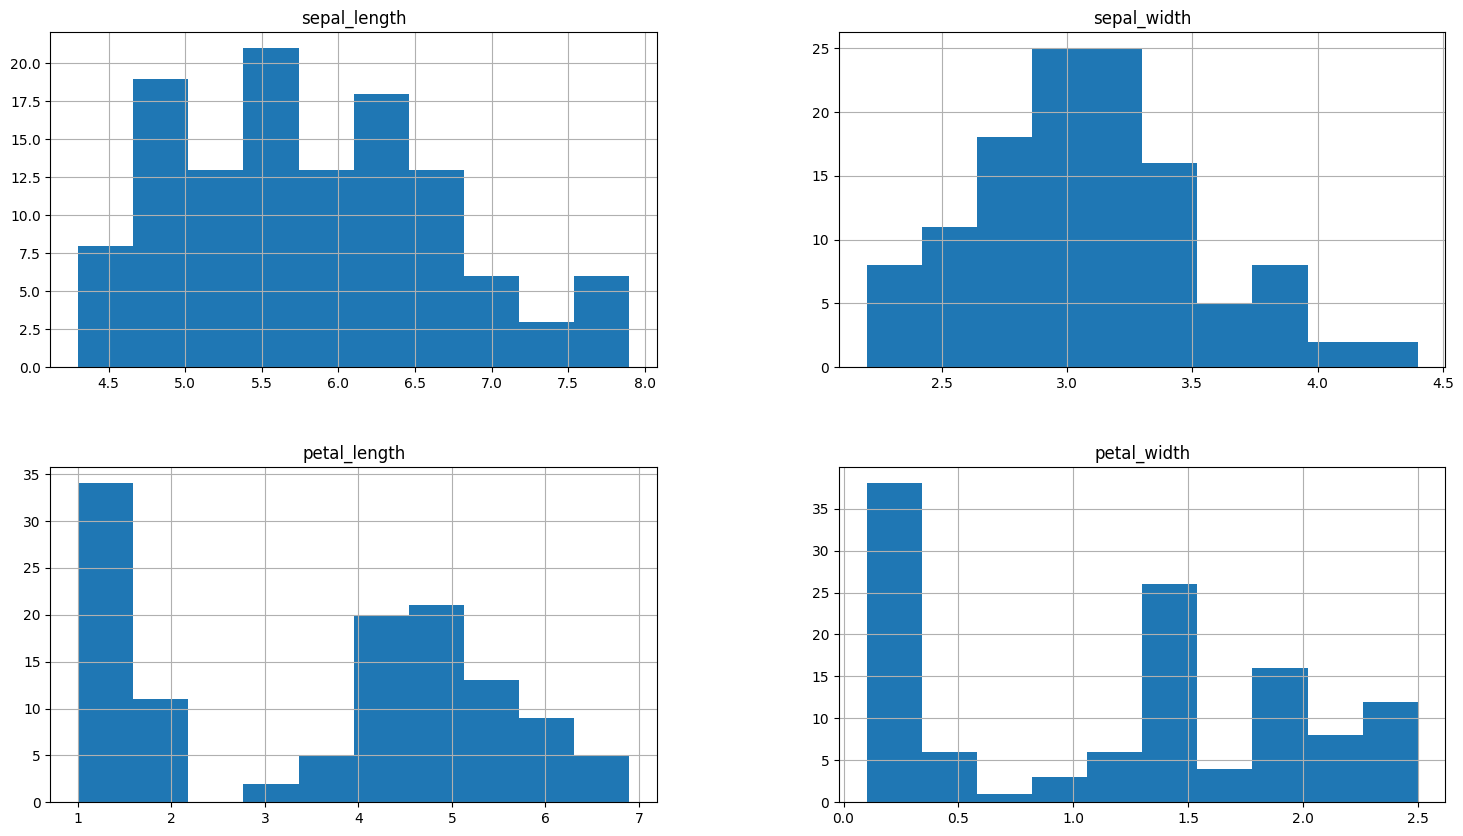

In [60]:
X_train.hist(figsize=(18, 10));

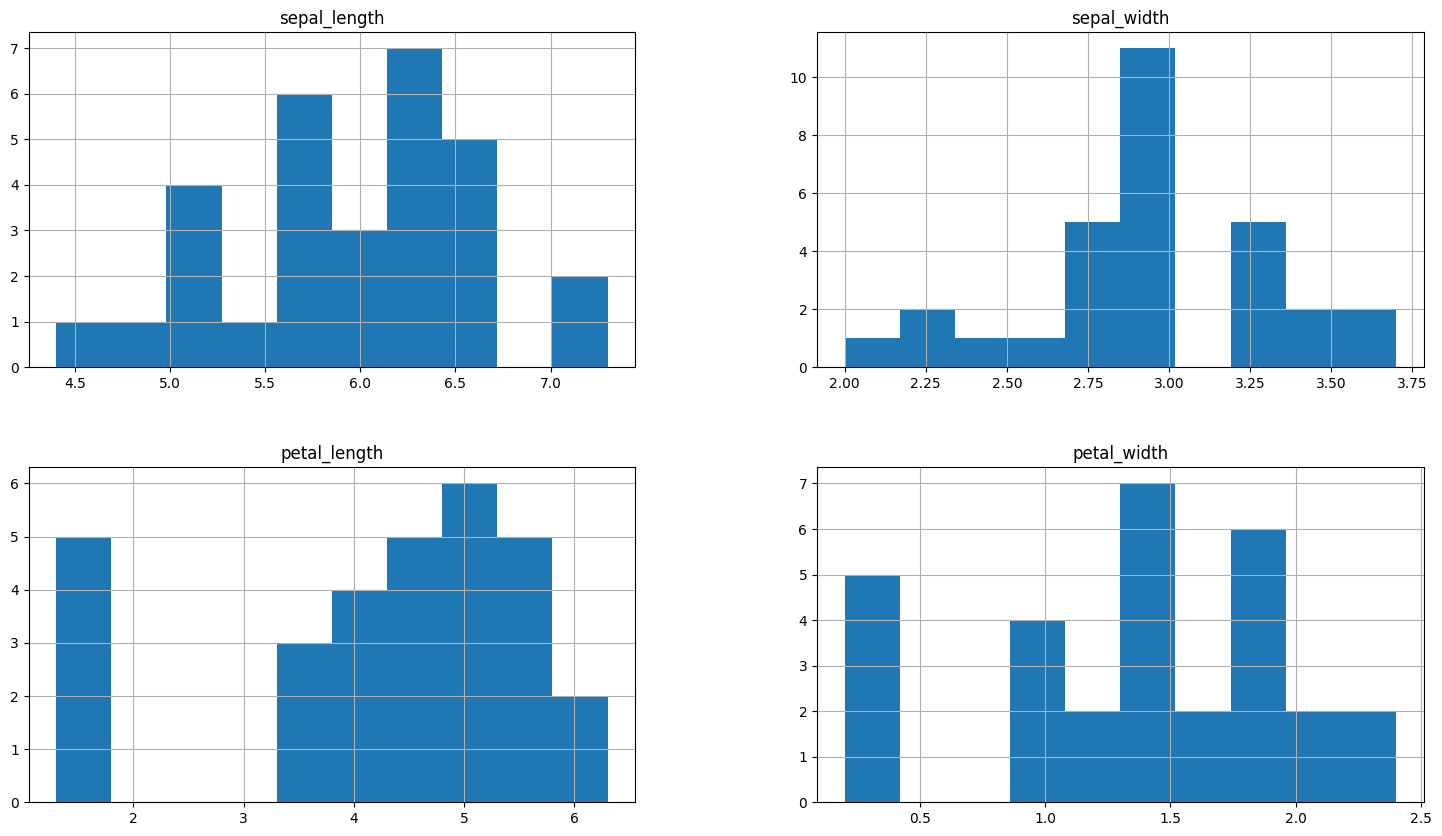

In [61]:
X_test.hist(figsize=(18, 10));

In [62]:
from sklearn.linear_model import LogisticRegression

In [65]:
logreg = LogisticRegression()

In [66]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [70]:
y_predicted_logreg = logreg.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_predicted_logreg, y_test)

0.9